# Importing necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

# Reading the Dataset

In [4]:
df=pd.read_csv('data.csv',encoding='unicode_escape')

In [5]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [6]:
df.shape

(435742, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

#  checking the descriptive stats of the numeric values in the data like mean, standard deviation,min values and max values present in the data 

In [8]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [9]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [10]:
df.nunique()
# These are all the unique values present in the database

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [11]:
df.columns
# These are all the columns present in the dataset

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

# Missing Values Treatment

In [12]:
nullvalues=df.isnull().sum().sort_values(ascending=False)
# checking all null values

In [13]:
nullvalues
# higher null values present in pm2_5 followed by spm

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [14]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(retruns Non-NAN value)

In [15]:
missing_data_with_percentage =pd.concat([nullvalues, null_values_percentage],axis=1,keys=['Total','Percent'])
#concatenating total null values and their percentage of missing values for further inputation or column deletion

In [16]:
missing_data_with_percentage

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [17]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Dropping unnecessary columns

In [18]:
df.isnull().sum()
#now checking the null values

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [19]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
#Null value Imputation for categorical data

In [21]:
df['so2']=df['so2'].fillna(df['so2'].mean())
df['no2']=df['no2'].fillna(df['no2'].mean())
df['rspm']=df['rspm'].fillna(df['rspm'].mean())
df['spm']=df['spm'].fillna(df['spm'].mean())
df['pm2_5']=df['pm2_5'].fillna(df['pm2_5'].mean())
# null value are replaced for the numerical data

In [22]:
df.isnull().sum()
# now we have successfully inputed null values which were present in the dataset

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [23]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.800000,17.400000,108.832784,220.78348,40.791467
1,Andhra Pradesh,Hyderabad,Industrial Area,3.100000,7.000000,108.832784,220.78348,40.791467
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.200000,28.500000,108.832784,220.78348,40.791467
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.300000,14.700000,108.832784,220.78348,40.791467
4,Andhra Pradesh,Hyderabad,Industrial Area,4.700000,7.500000,108.832784,220.78348,40.791467
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.000000,50.000000,143.000000,220.78348,40.791467
435738,West Bengal,ULUBERIA,RIRUO,20.000000,46.000000,171.000000,220.78348,40.791467
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467


# Calculate Air Quality index for so2 Based on formula

In [24]:
def cal_SOi(so2):
    si=0
    if(so2<=40):
        si=so2*(50/40)
    elif (so2>40 and so2<=80):
        si=50+(so2-40)*(50/40)
    elif (so2>80 and so2<=300):
        si=100+(so2-80)*(100/300)
    elif (so2>300 and so2<=800):
        si=200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
        si=300+(so2-800)*(100/800)
    elif (so2>1600):
        si=400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data=df[['so2','SOi']]
data.head()
# Calculating the individual pollutant index for so2

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


# Function to Calculate Air Quality index for no2 individual pollutant index(ni)

In [25]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
        ni=no2*(50/40)
    elif (no2>40 and no2<=80):
        ni=50+(no2-40)*(50/40)
    elif (no2>80 and no2<=180):
        ni=100+(no2-80)*(100/100)
    elif (no2>180 and no2<=280):
        ni=200+(no2-180)*(100/100)
    elif (no2>280 and no2<=400):
        ni=300+(no2-280)*(100/120)
    else:
        ni=400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data=df[['no2','Noi']]
data.head()
# Calculating the individual pollutant index for no2

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [26]:
def cal_RSPMI(rspm):
    rpi=0
    if(rspm<=30):
        rpi=rspm*(50/30)
    elif (rspm>30 and rspm<=60):
        rpi=50+(rspm-30)*(50/30)
    elif (rspm>60 and rspm<=90):
        rpi=100+(rspm-60)*(100/30)
    elif (rspm>90 and rspm<=120):
        rpi=200+(rspm-90)*(100/30)
    elif (rspm>120 and rspm<=250):
        rpi=300+(rspm-120)*(100/130)
    else:
         rpi=400+(rspm-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data=df[['rspm','Rpi']]
data.head()



,rspm,Rpi
0,108.832784,262.775947
1,108.832784,262.775947
2,108.832784,262.775947
3,108.832784,262.775947
4,108.832784,262.775947


In [27]:
def cal_SPMi(spm):
    spi=0
    if(spi<=50):
        spi=spm*(50/50)
    elif (spm>50 and spm<=100):
        spi=50+(spm-50)*(50/50)
    elif (spm>100 and spm<=250):
        spi=100+(spm-100)*(100/150)
    elif (spm>250 and spm<=350):
        spi=200+(spm-250)*(100/100)
    elif (spm>350 and spm<=430):
        spi=300+(spm-350)*(100/80)
    else:
        spi=400+(spm-430)*(100/430)
    return spi
df['SPMi']=df['spm'].apply(cal_SPMi)
df['SPMi']=df['spm'].apply(cal_SPMi)
data=df[['spm','SPMi']]
data.head()
# Calculating the individual pollutant index for spm

,spm,SPMi
0,220.78348,220.78348
1,220.78348,220.78348
2,220.78348,220.78348
3,220.78348,220.78348
4,220.78348,220.78348


# Function to calculate the air quality index of every data value

In [28]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
        aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
        aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
        aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
        aqi=spmi
    return aqi
df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data = df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
#Calculate the AQI

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,262.775947,220.78348,262.775947
1,Andhra Pradesh,3.875,8.750,262.775947,220.78348,262.775947
2,Andhra Pradesh,7.750,35.625,262.775947,220.78348,262.775947
3,Andhra Pradesh,7.875,18.375,262.775947,220.78348,262.775947
4,Andhra Pradesh,5.875,9.375,262.775947,220.78348,262.775947


In [29]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very Unhealthy"
    elif x>400:
        return "Hazordous"
df["AQI_Range"]=df['AQI'].apply(AQI_Range)
df
#using threshold values to classify a particular value as good,moderate,poor,unhealthy,very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.800000,17.400000,108.832784,220.78348,40.791467,6.000000,21.750000,262.775947,220.78348,262.775947,Unhealthy
1,Andhra Pradesh,Hyderabad,Industrial Area,3.100000,7.000000,108.832784,220.78348,40.791467,3.875000,8.750000,262.775947,220.78348,262.775947,Unhealthy
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.200000,28.500000,108.832784,220.78348,40.791467,7.750000,35.625000,262.775947,220.78348,262.775947,Unhealthy
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.300000,14.700000,108.832784,220.78348,40.791467,7.875000,18.375000,262.775947,220.78348,262.775947,Unhealthy
4,Andhra Pradesh,Hyderabad,Industrial Area,4.700000,7.500000,108.832784,220.78348,40.791467,5.875000,9.375000,262.775947,220.78348,262.775947,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.000000,50.000000,143.000000,220.78348,40.791467,27.500000,62.500000,317.692308,220.78348,317.692308,Very Unhealthy
435738,West Bengal,ULUBERIA,RIRUO,20.000000,46.000000,171.000000,220.78348,40.791467,25.000000,57.500000,339.230769,220.78348,339.230769,Very Unhealthy
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,13.536768,32.262029,262.775947,220.78348,262.775947,Unhealthy
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,13.536768,32.262029,262.775947,220.78348,262.775947,Unhealthy


# Data Visualization

In [30]:
df['state'].value_counts()
#Viewing the count of values present in the state column

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

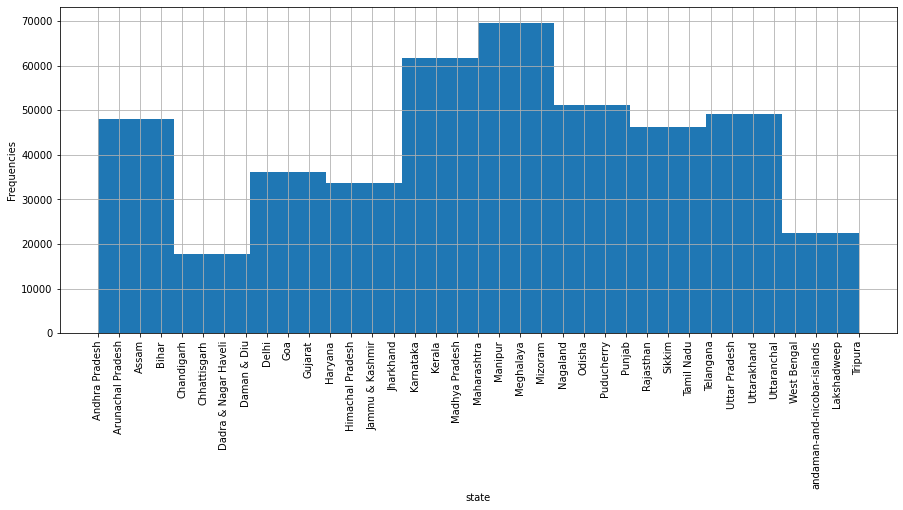

In [31]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot
# The visualization shows us the count of states present in the dataset

In [32]:
df['type'].value_counts()
# Viewing the count of values present in the type column

Residential, Rural and other Areas    184407
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

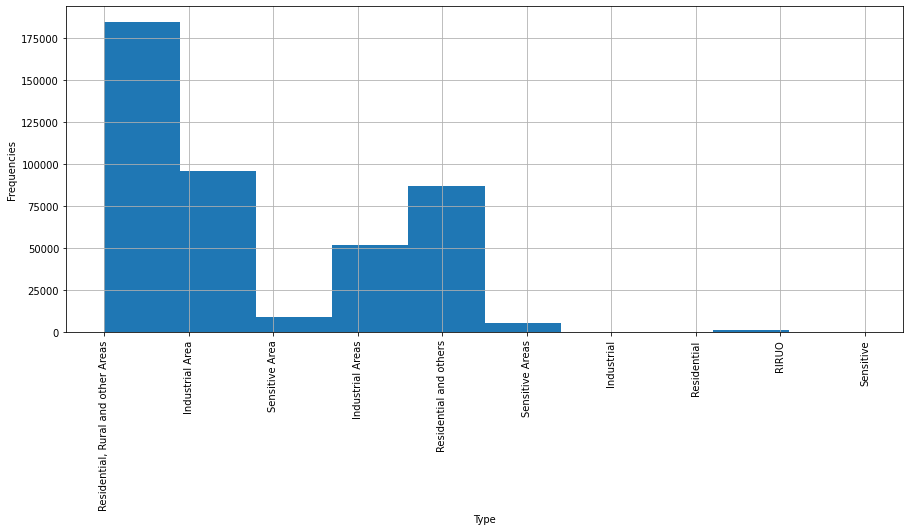

In [33]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot
# The visualization shows us the count of Types present in the dataset

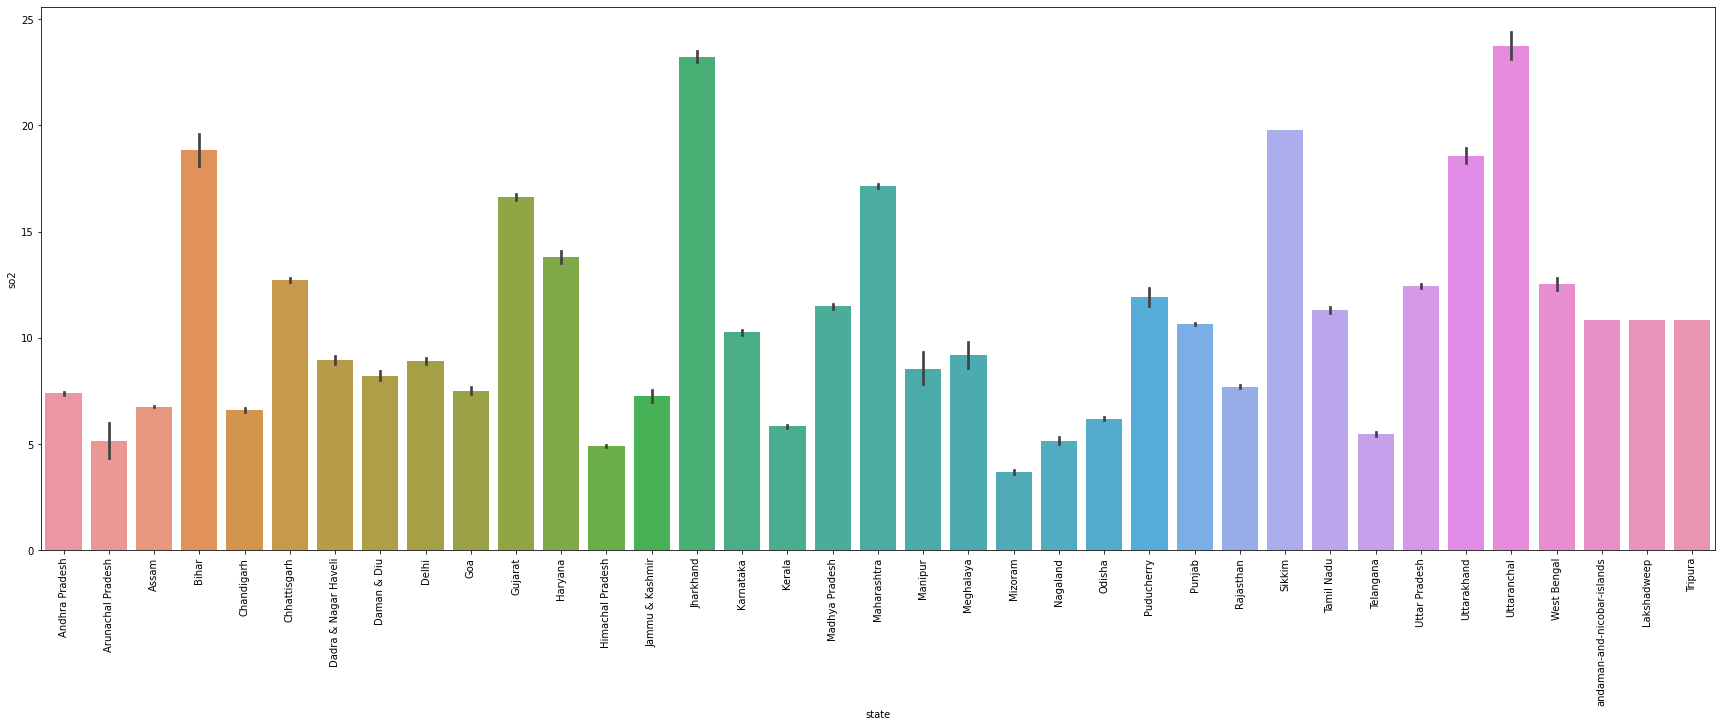

In [34]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state' ,y='so2', data=df);
#This visualization shows the name of the state having higher so2 levels in the air which is uttaranchal followed by uttarakhand

In [35]:
plt.rcParams['figure.figsize']=(30,10)

<AxesSubplot:xlabel='state'>

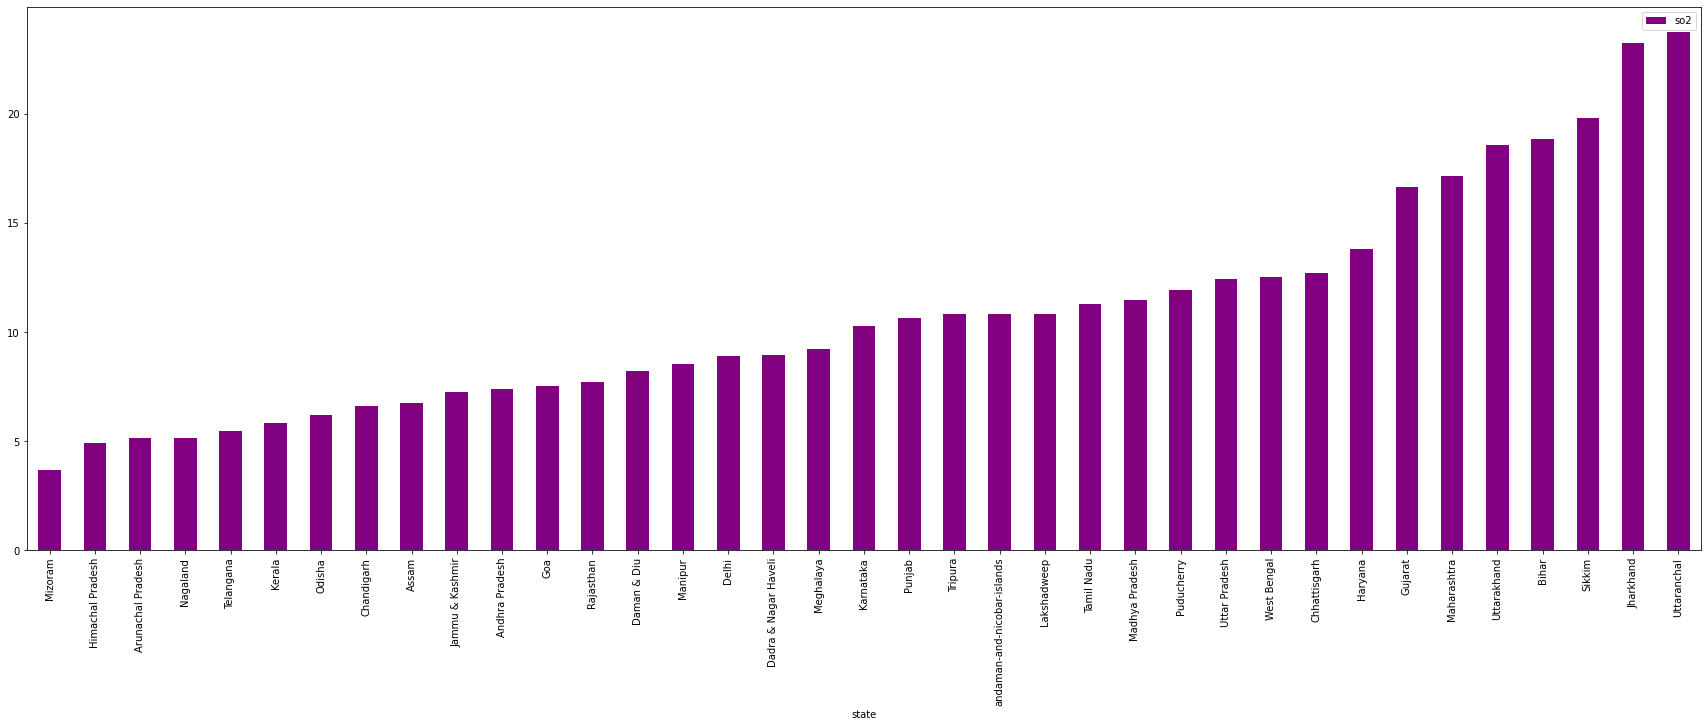

In [36]:
df[['so2','state']].groupby(['state']).mean().sort_values(by='so2').plot.bar(color='purple')
#we can also use the groupby function to sort values in an ascending order based x-axis,y-axis and its keys
#Below we get a clear picture of the states in an increasing order based on their so2 levels 

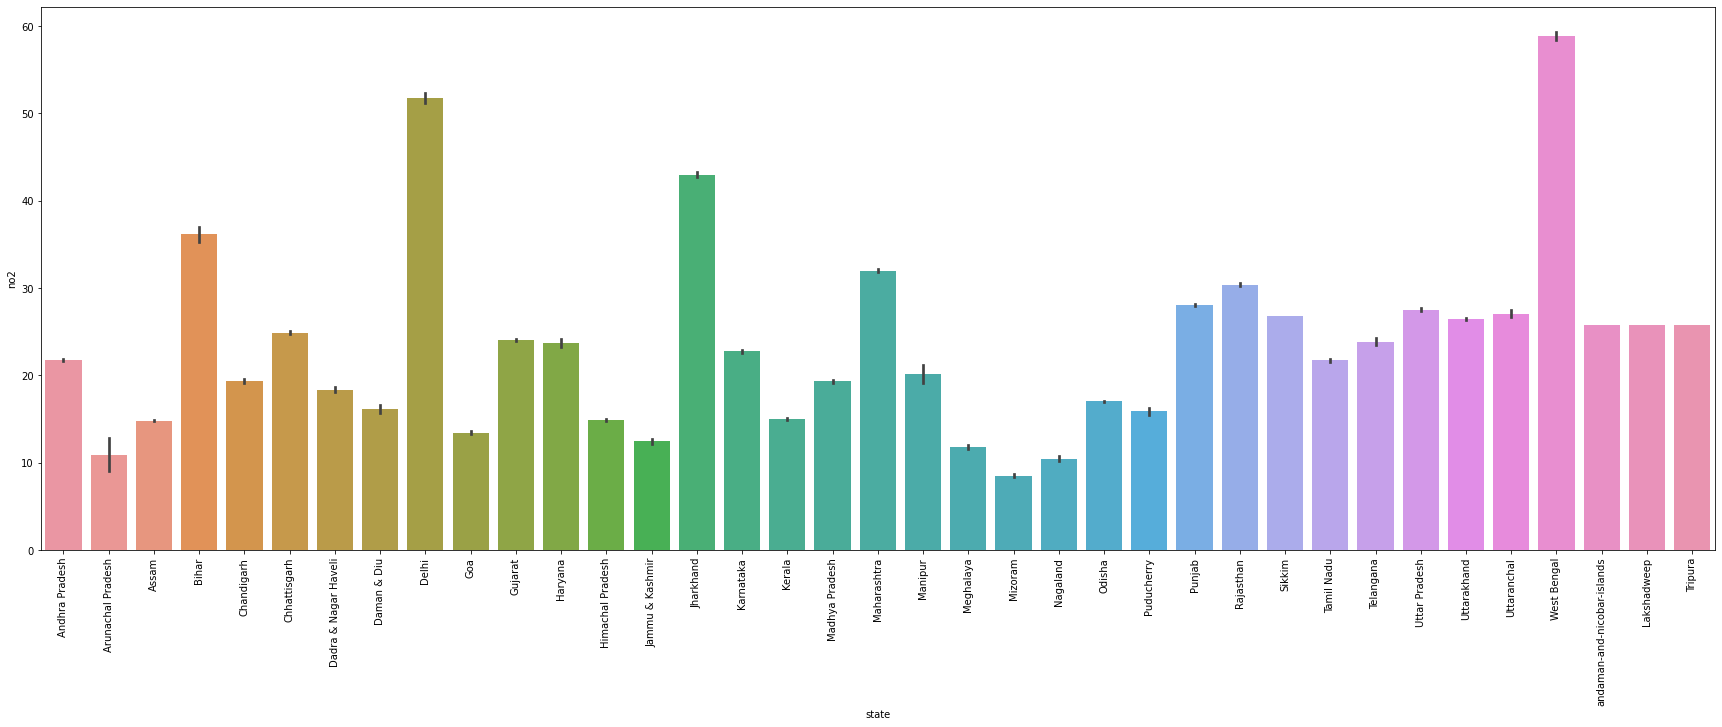

In [37]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state' ,y='no2', data=df);
#This visualization shows the name of the state having higher no2 levels in the air i.e., west Bengal  

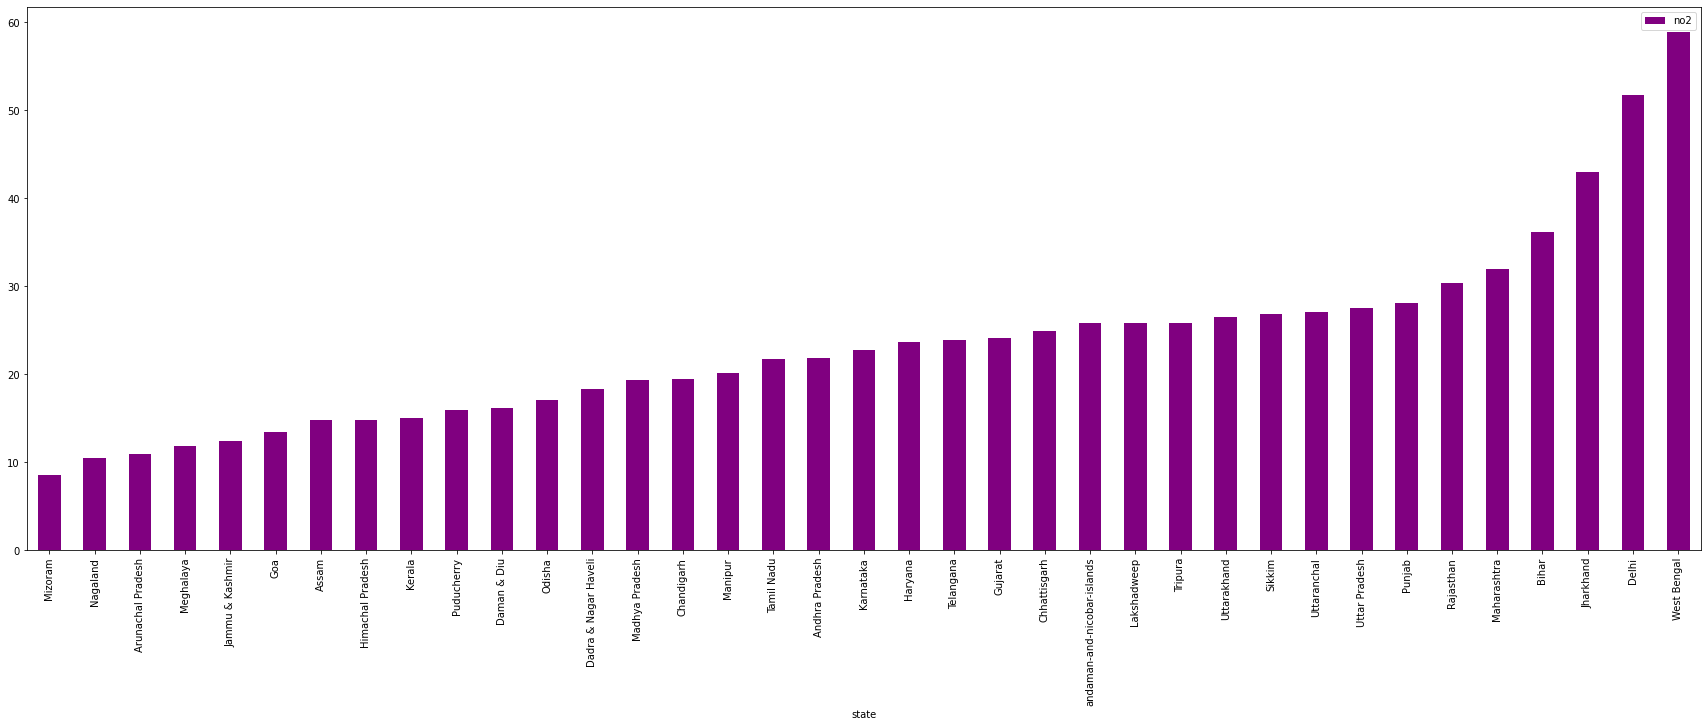

In [38]:
df[['no2','state']].groupby(['state']).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()
#we can also use the groupby function to sort values in an ascending order based x-axis,y-axis and its keys
#Below we get a clear picture of the states in an increasing order based on their so2 levels 

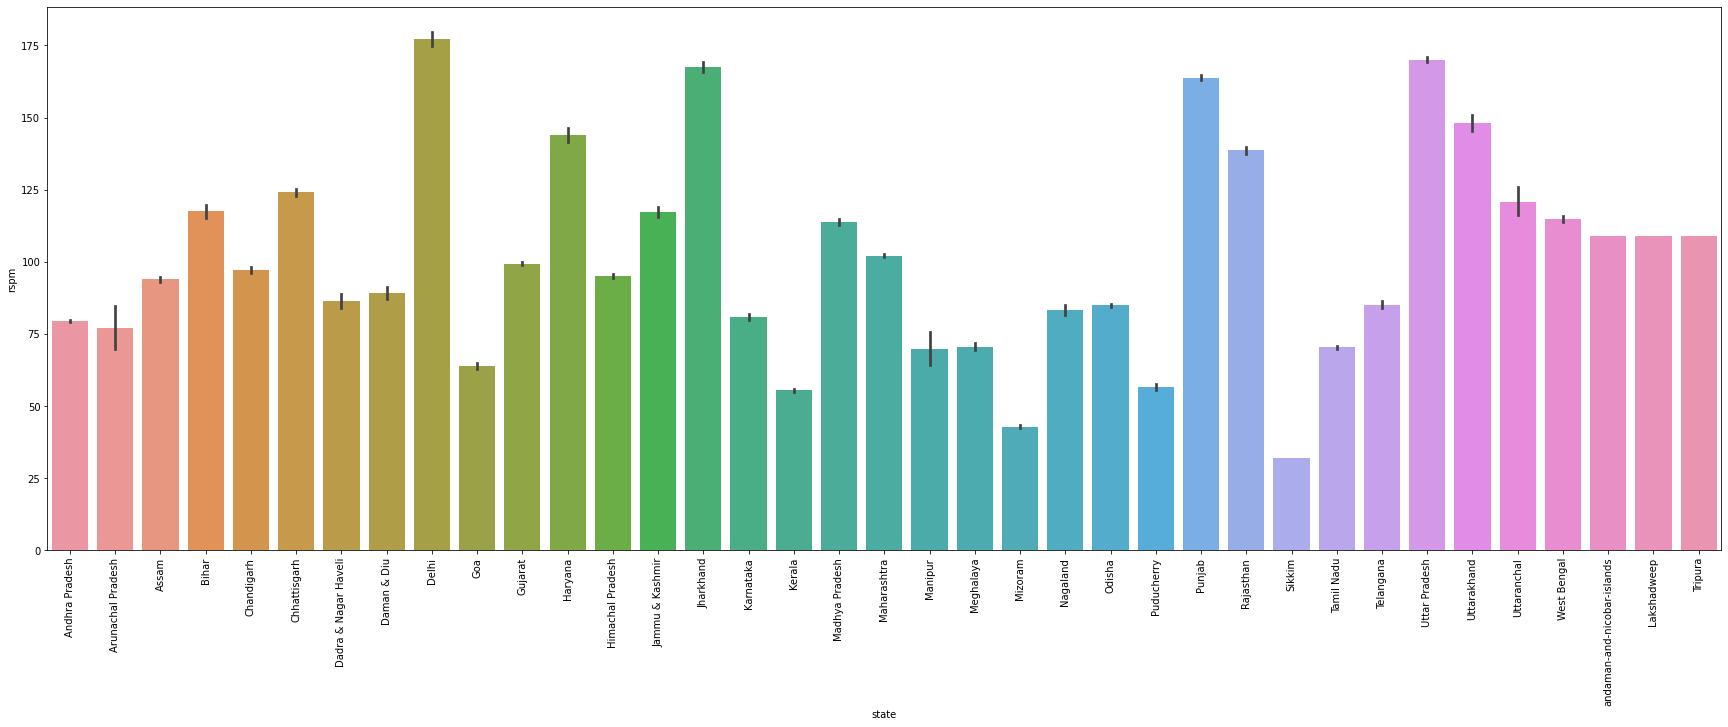

In [39]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state' ,y='rspm', data=df);
# Delhi has higher rspm level compared to other states

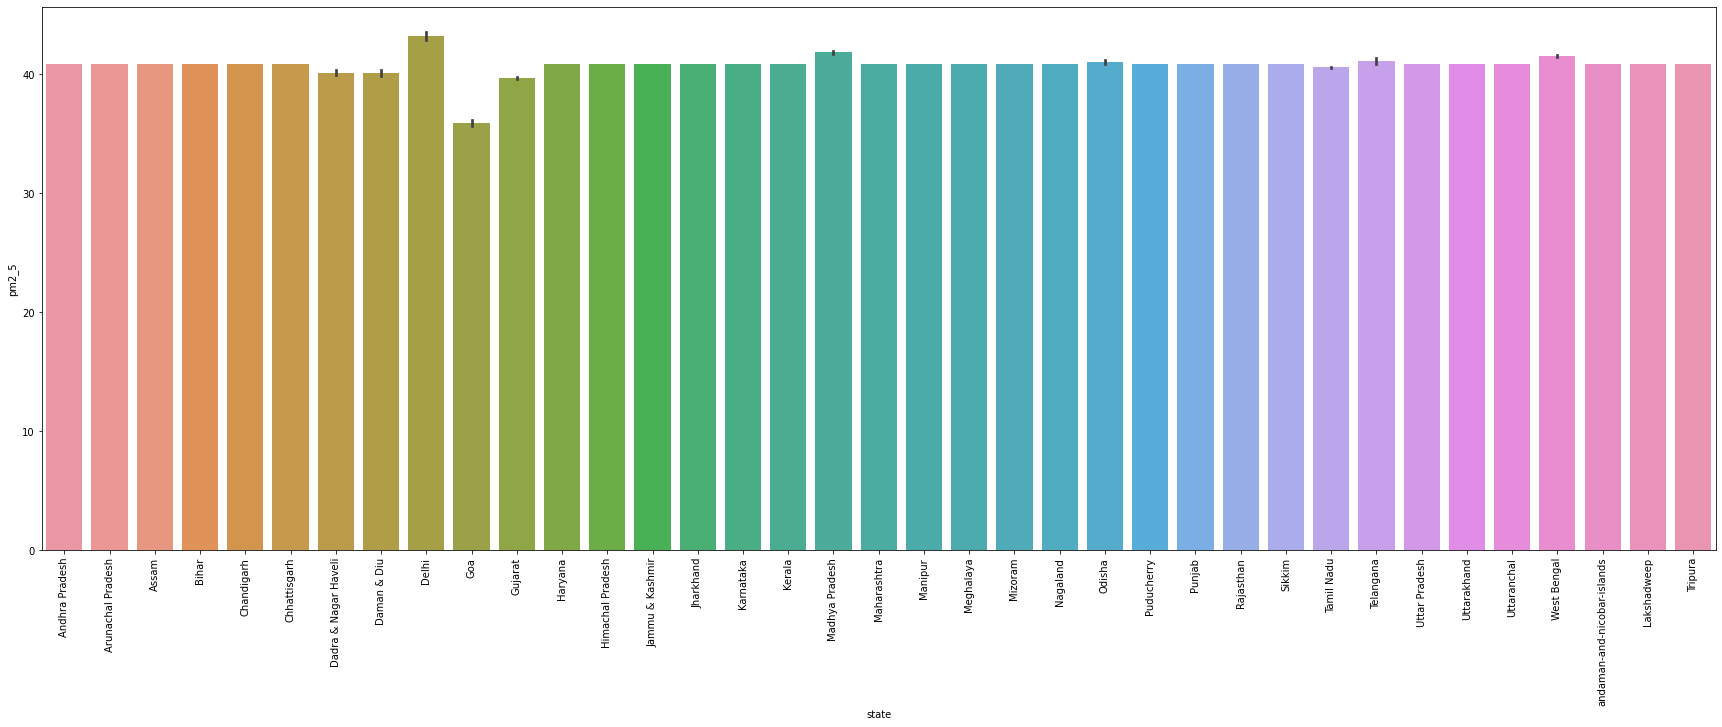

In [40]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state' ,y='pm2_5', data=df);
# Delhi has higher pm2_5 level compared to other states

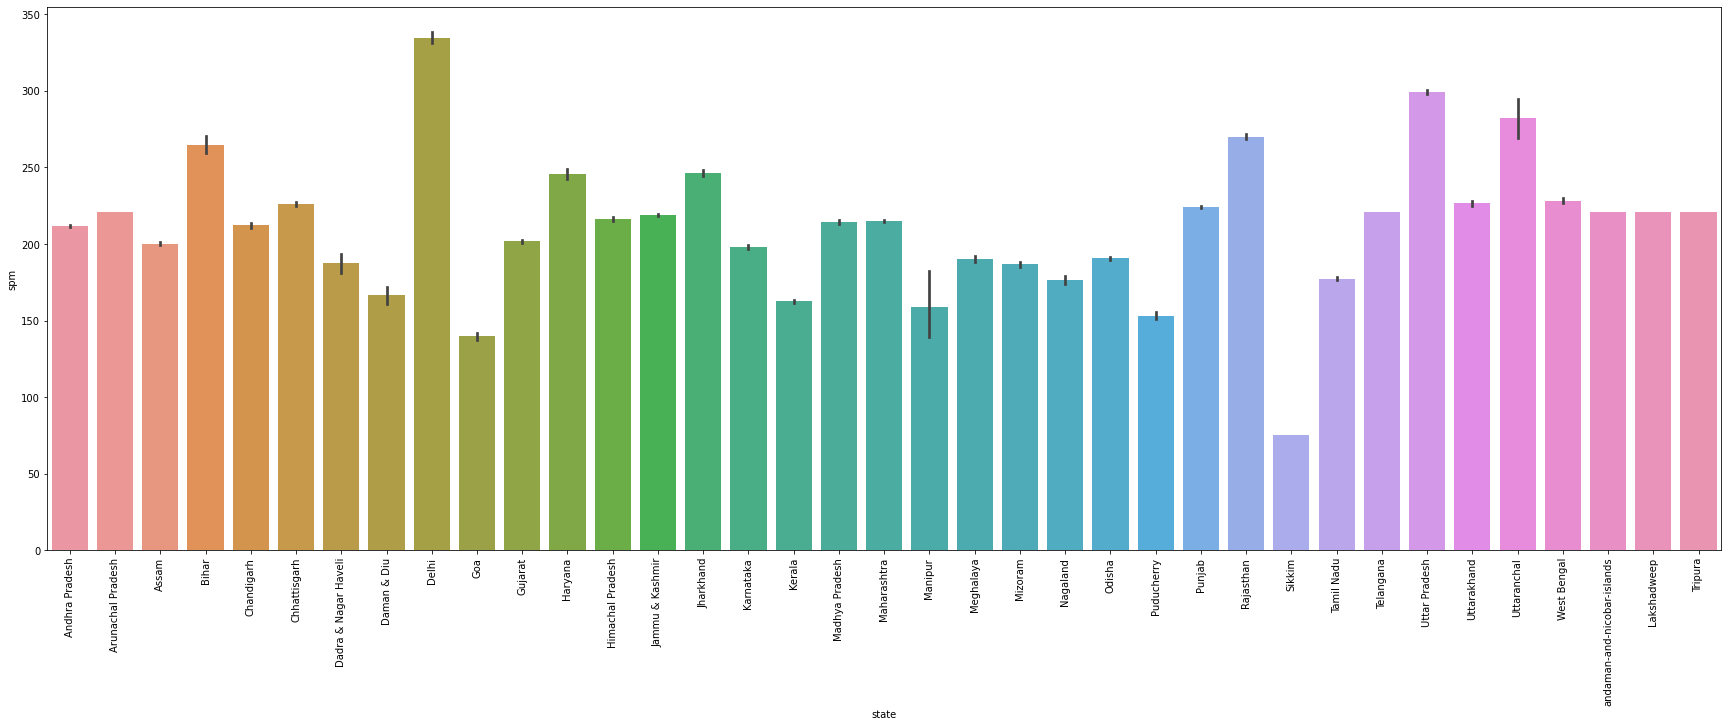

In [41]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state' ,y='spm', data=df);
# Delhi has higher spm level compared to other states

In [42]:
df['AQI_Range'].value_counts()
#There are the  counts of values present in the AQI_Range column

Unhealthy         213858
Very Unhealthy    109332
Poor               45580
Hazordous          36999
Moderate           25060
Good                4913
Name: AQI_Range, dtype: int64

In [43]:
x=df[['so2','no2','rspm','spm']]
y=df['AQI']
x.head()
#we only select columns like soi,noi,rpi,spmi

,so2,no2,rspm,spm
0,4.8,17.4,108.832784,220.78348
1,3.1,7.0,108.832784,220.78348
2,6.2,28.5,108.832784,220.78348
3,6.3,14.7,108.832784,220.78348
4,4.7,7.5,108.832784,220.78348


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=60)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
#splitting the data into training and testing data

(261445, 4) (174297, 4) (261445,) (174297,)


# Training the model using Linear Regression

In [45]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [46]:
###### Predicting Train
train_pred= model.predict(x_train)
##### Predicting test
test_pred= model.predict(x_test)

In [47]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print("RMSE Test Data = ",str(RMSE_test))
print("Accuracy of Linear regression on test data :",model.score(x_test,y_test))

RMSE Test Data =  33.39010430958804
Accuracy of Linear regression on test data : 0.9083420357636653


# Predicting the AQI Value

In [62]:
model.predict([[12.7,45,35.16,13]])

array([74.54924066])

In [54]:
model.predict([[51,41,100,60]])

array([165.90979491])

In [57]:
model.predict([[381,181,251,91]])

array([371.13649026])

In [61]:
model.predict([[180,281,430,250]])

array([578.39541336])

In [63]:
acc=model.score(x_test,y_test)
print("Accuracy of Linear Regression Algorithm is :",acc)

Accuracy of Linear Regression Algorithm is : 0.9083420357636653
